In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [474]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/train.csv')
test= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/test.csv')

In [475]:
print(train.shape)

train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4500) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['MasVnrArea']>1400) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['BsmtFinSF1']>5000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['BedroomAbvGr']>7) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

print(train.shape)

(1460, 81)
(1452, 81)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


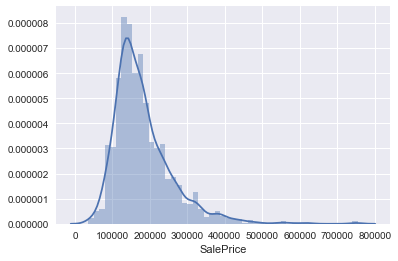

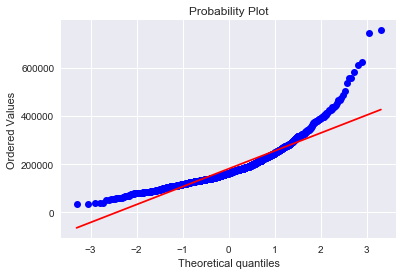

In [6]:
sns.distplot(train.SalePrice)
fig = plt.figure(figsize=[6,4])
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


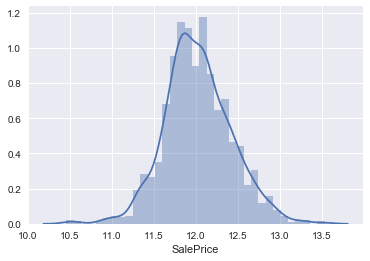

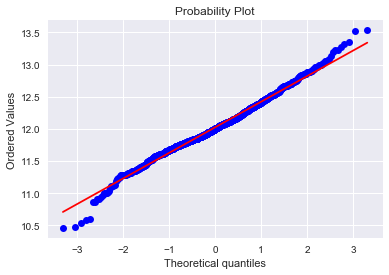

In [7]:
sns.distplot(np.log(train.SalePrice))
fig = plt.figure(figsize=[6,4])
res = stats.probplot(np.log(train.SalePrice), plot=plt)

In [4]:
data= pd.concat([train.drop(['SalePrice'], axis=1), test])

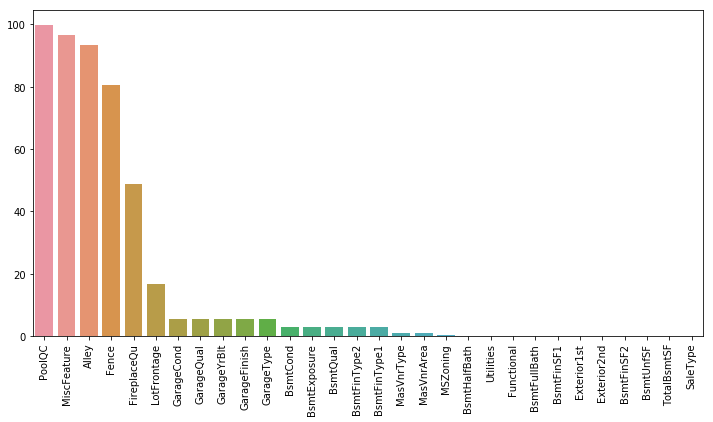

In [420]:
xx= (data.isnull().sum())/len(data)*100
xx=xx.sort_values(ascending=False).head(30)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(xx.keys(), xx)

In [5]:
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing= pd.concat([total,percent], axis=1, join='outer', keys=['Total missing count', 'Percentage '])
missing.head(35)

,Total missing count,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [ ]:
data[data['PoolArea']!=0][['Id','PoolArea', 'PoolQC','OverallQual']]

In [476]:
test.loc[960, 'PoolQC']='Fa'
test.loc[1043, 'PoolQC']='Gd'
test.loc[1139, 'PoolQC']='Fa'

train['PoolQC'].fillna('None', inplace=True)
test['PoolQC'].fillna('None', inplace=True)

In [478]:
#data[data['MiscVal']>10000][['Id','MiscFeature', 'MiscVal','OverallQual']]

In [477]:
#test[test['Id']==2550]['MiscFeature']
#test.loc[1089, 'MiscFeature']='Gar2'

#train['MiscFeature'].fillna('None', inplace=True)
#test['MiscFeature'].fillna('None', inplace=True)

In [479]:
#test[test['Id']==2550]['MiscFeature']

In [ ]:
data[data['Fireplaces']==0][['Id','Fireplaces','FireplaceQu']]

In [481]:
train['FireplaceQu'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('None', inplace=True)

In [17]:
data['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [167]:
print(train['LotFrontage'].mean())
print(test['LotFrontage'].mean())

70.04995836802665
68.58035714285714


In [482]:
train['LotFrontage'].fillna(70, inplace=True)
test['LotFrontage'].fillna(68, inplace=True)

In [ ]:
data[data['GarageQual'].isnull()==True][['Id','GarageCars','GarageArea','GarageQual','GarageCond','GarageYrBlt','GarageType']]

In [483]:
train['GarageQual'].fillna('None', inplace=True)
test['GarageQual'].fillna('None', inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
train['GarageYrBlt'].fillna('None', inplace=True)
test['GarageYrBlt'].fillna('None', inplace=True)
train['GarageType'].fillna('None', inplace=True)
test['GarageType'].fillna('None', inplace=True)
train['GarageCond'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)

In [484]:
test.loc[test['Id']==2577, 'GarageType']='None'

In [23]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtCond'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
580,2041,1426.0,NaN,Gd,Mn,Rec,GLQ,1044.0,382.0,0.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,2186,1127.0,NaN,TA,No,Unf,BLQ,1033.0,0.0,94.0
1064,2525,995.0,NaN,TA,Av,Unf,ALQ,755.0,0.0,240.0


In [485]:
test.loc[test['Id']==2041, 'BsmtCond']='Gd'
test.loc[test['Id']==2186, 'BsmtCond']='TA'
test.loc[test['Id']==2525, 'BsmtCond']='TA'

train['BsmtCond'].fillna('None', inplace=True)
test['BsmtCond'].fillna('None', inplace=True)

In [26]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtExposure'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure
948,949,936.0,TA,Gd,NaN
27,1488,1595.0,TA,Gd,NaN
660,2121,NaN,NaN,NaN,NaN
888,2349,725.0,TA,Gd,NaN


In [486]:
train['BsmtExposure'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)

In [28]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtQual'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,2218,173.0,NaN,Fa,No,Unf,Unf,0.0,0.0,173.0
758,2219,356.0,NaN,TA,No,Unf,Unf,0.0,0.0,356.0


In [487]:
test.loc[test['Id']==2218, 'BsmtQual']='Fa'
test.loc[test['Id']==2219, 'BsmtQual']='TA'

train['BsmtQual'].fillna('None', inplace=True)
test['BsmtQual'].fillna('None', inplace=True)

In [30]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinType2'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
332,333,3206.0,Gd,TA,No,NaN,479.0,1603.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
train.loc[train['Id']==333, 'BsmtFinType2']='Unf'

train['BsmtFinType2'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)

In [489]:
train['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)

test['BsmtHalfBath'].fillna(0, inplace=True)

test['BsmtFullBath'].fillna(0, inplace=True)

test['BsmtFinSF1'].fillna(0, inplace=True)

test['BsmtFinSF2'].fillna(0, inplace=True)

test['BsmtUnfSF'].fillna(0, inplace=True)

test['TotalBsmtSF'].fillna(0, inplace=True)

In [490]:
train['MasVnrType'].fillna('None', inplace=True)

test['MasVnrType'].fillna('None', inplace=True)

train['MasVnrArea'].fillna(0, inplace=True)

test['MasVnrArea'].fillna(0, inplace=True)

In [491]:
print(test['MSZoning'].mode())
#print(test['Utilities'].mode())

0    RL
dtype: object


In [492]:
test['MSZoning'].fillna('RL', inplace=True)

#test['Utilities'].fillna('AllPub', inplace=True)

test['GarageCars'].fillna(0, inplace=True)

test['GarageArea'].fillna(0, inplace=True)

#train['Fence'].fillna('None', inplace=True)

#test['Fence'].fillna('None', inplace=True)

#train['Alley'].fillna('None', inplace=True)

#test['Alley'].fillna('None', inplace=True)

In [112]:
print(test['Functional'].mode())
print(test['SaleType'].mode())
print(test['Exterior1st'].mode())
print(test['KitchenQual'].mode())
print(test['Exterior2nd'].mode())

0    Typ
dtype: object
0    WD
dtype: object
0    VinylSd
dtype: object
0    TA
dtype: object
0    VinylSd
dtype: object


In [493]:
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)

In [43]:
train['Electrical'].mode()

0    SBrkr
dtype: object

In [494]:
train['Electrical'].fillna('SBrkr', inplace=True)

In [495]:
train.drop(['Alley','Fence', 'Utilities', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley','Fence', 'Utilities', 'MiscFeature'], axis=1, inplace=True)

In [496]:
print(train.isnull().sum().sort_values(ascending=False).head(5))
print(test.isnull().sum().sort_values(ascending=False).head(5))

SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
dtype: int64
SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64


In [497]:
train.shape, test.shape

((1452, 77), (1459, 76))

In [583]:
train.to_csv("train_cleaned.csv", index=False)
test.to_csv("test_cleaned.csv", index=False)

In [498]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

In [499]:
train_dummies.shape, test_dummies.shape

((1452, 389), (1459, 389))

In [500]:
y=np.asarray(train['SalePrice'])
y=np.log(y+1)
print(y[:5])

[12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]


In [501]:
n

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [502]:
train_dummies[n]=np.log(train_dummies[n]+1)

In [504]:
train_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


## Modeling

In [570]:
x=np.asarray(train_dummies)
x.shape,y.shape

((1452, 389), (1452,))

In [628]:
kf = KFold(n_splits=5,random_state=None, shuffle=False)

train_rr=[]
test_rr=[]
train_gbr=[]
test_gbr=[]
train_xgbr=[]
test_xgbr=[]
train_lsr=[]
test_lsr=[]
rr_mse, gbr_mse, xgbr_mse, lsr_mse=[],[],[],[]

RR= Ridge(alpha=6)
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=300)
xgbr = XGBRegressor(max_depth=5, n_estimators=300)
lsr = Lasso(alpha=0.00057)

for train_index, test_index in kf.split(x):
    
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        RR.fit(xtrain, ytrain)
        predict_rr= RR.predict(xtrain)
        predict_rr_= RR.predict(xtest)
        
        train_rr.append(r2_score(predict_rr, ytrain))
        test_rr.append(r2_score(predict_rr_, ytest))
        rr_mse.append(mean_squared_error(ytest,predict_rr_))
        
        gbr.fit(xtrain, ytrain)
        predict_gbr= gbr.predict(xtrain)
        predict_gbr_= gbr.predict(xtest)
        
        train_gbr.append(r2_score(predict_gbr, ytrain))
        test_gbr.append(r2_score(predict_gbr_, ytest))
        gbr_mse.append(mean_squared_error(ytest,predict_gbr_))
        
        xgbr.fit(xtrain, ytrain)
        predict_xgbr= xgbr.predict(xtrain)
        predict_xgbr_= xgbr.predict(xtest)
        
        train_xgbr.append(r2_score(predict_xgbr, ytrain))
        test_xgbr.append(r2_score(predict_xgbr_, ytest))
        xgbr_mse.append(mean_squared_error(ytest,predict_xgbr_))
        
        lsr.fit(xtrain, ytrain)
        predict_lsr= lsr.predict(xtrain)
        predict_lsr_= lsr.predict(xtest)
        
        train_lsr.append(r2_score(predict_lsr, ytrain))
        test_lsr.append(r2_score(predict_lsr_, ytest))
        lsr_mse.append(mean_squared_error(ytest,predict_lsr_))

In [629]:
print("Ridge: ",np.asarray(test_rr).mean())
print("GradientBoosting: ",np.asarray(test_gbr).mean())
print("XGBRegressor: ",np.asarray(test_xgbr).mean())
print("Lasso: ", np.asarray(test_lsr).mean())

Ridge:  0.9041826055939713
GradientBoosting:  0.8934556408569991
XGBRegressor:  0.8940506072628963
Lasso:  0.9075509613865977


In [631]:
print(np.asarray(rr_mse).mean())
print(np.asarray(gbr_mse).mean())
print(np.asarray(xgbr_mse).mean())
print(np.asarray(lsr_mse).mean())

0.013769155205907735
0.01475290687980535
0.01466073811791041
0.01316045629487574


In [610]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=4)

In [611]:
RR= Ridge(alpha=6)

RR.fit(xtrain, ytrain)

predict_rr= RR.predict(xtrain)


print("Error by R2_Score: %.5f " % r2_score(predict_rr, ytrain))

print("Mean squared error: %.5f" % mean_squared_error(ytrain, predict_rr))

predict_rr_= RR.predict(xtest)

print("Error by R2_Score: %.5f " % r2_score(predict_rr_, ytest))

print("Mean squared error: %.5f" % mean_squared_error(ytest, predict_rr_))

Error by R2_Score: 0.94109 
Mean squared error: 0.00833
Error by R2_Score: 0.91973 
Mean squared error: 0.01321


In [555]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=300)
gbr.fit(xtrain, ytrain)

predict_gbr= gbr.predict(xtrain)

print("Error by R2_Score: %.5f " % r2_score(predict_gbr, ytrain))

print("Mean squared error: %.5f" % mean_squared_error(ytrain, predict_gbr))

predict_gbr_= gbr.predict(xtest)

print("Error by R2_Score: %.5f " % r2_score(predict_gbr_, ytest))

print("Mean squared error: %.5f" % mean_squared_error(ytest, predict_gbr_))

Error by R2_Score: 0.99569 
Mean squared error: 0.00065
Error by R2_Score: 0.91204 
Mean squared error: 0.01361


In [556]:
xgbr = XGBRegressor(max_depth=5, n_estimators=300)
xgbr.fit(xtrain, ytrain)

predict_xgbr= xgbr.predict(xtrain)

print("Error by R2_Score: %.5f " % r2_score(predict_xgbr, ytrain))

print("Mean squared error: %.5f" % mean_squared_error(ytrain, predict_xgbr))

predict_xgbr_= xgbr.predict(xtest)

print("Error by R2_Score: %.5f " % r2_score(predict_xgbr_, ytest))

print("Mean squared error: %.5f" % mean_squared_error(ytest, predict_xgbr_))

Error by R2_Score: 0.99762 
Mean squared error: 0.00036
Error by R2_Score: 0.90455 
Mean squared error: 0.01488


## Stacking

In [558]:
merge= pd.concat([pd.DataFrame(predict_gbr),pd.DataFrame(predict_xgbr),pd.DataFrame(predict_lsr),pd.DataFrame(predict_rr)], axis=1)
merge_= pd.concat([pd.DataFrame(predict_gbr_),pd.DataFrame(predict_xgbr_),pd.DataFrame(predict_lsr_),pd.DataFrame(predict_rr_)], axis=1)

In [559]:
merge.head()

,0,0,0,0
0,11.400178,11.414195,11.466364,11.493970
1,11.683493,11.685521,11.590479,11.591096
2,11.812033,11.830941,11.792823,11.823804
3,11.808213,11.812553,11.719680,11.719998
4,11.029702,10.993779,11.360834,11.287574


In [560]:
xx= np.asarray(merge)
xx_= np.asarray(merge_)

In [561]:
xx.shape, xx_.shape

((1016, 4), (436, 4))

In [562]:
myLGB = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=300,
                              max_bin = 25, bagging_fraction = 0.4,
                              bagging_freq = 5, feature_fraction = 0.20,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 4)
myLGB.fit(xx, ytrain)

LGBMRegressor(bagging_fraction=0.4, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=25,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=4, min_split_gain=0.0, n_estimators=300, n_jobs=-1,
       num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [563]:
predict_ml= myLGB.predict(xx)

print("Error by R2_Score: %.5f " % r2_score(predict_ml, ytrain))

print("Mean squared error: %.5f" % mean_squared_error(ytrain, predict_ml))

predict_ml_= myLGB.predict(xx_)

print("Error by R2_Score: %.5f " % r2_score(predict_ml_, ytest))

print("Mean squared error: %.5f" % mean_squared_error(ytest, predict_ml_))

Error by R2_Score: 0.96474 
Mean squared error: 0.00523
Error by R2_Score: 0.90987 
Mean squared error: 0.01461


### Test data

In [450]:
test_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [451]:
test_dummies[n]=np.log(test_dummies[n]+1)

In [452]:
test_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.406719,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.317488,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.369448,9.208238,1.945910,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,3.784190,8.518392,2.197225,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [453]:
xxx=np.asarray(test_dummies)

In [410]:
p1=gbr.predict(xxx)
p2=xgbr.predict(xxx)
p3=lsr.predict(xxx)
p4=RR.predict(xxx)

In [411]:
m= pd.concat([pd.DataFrame(p1),pd.DataFrame(p2),pd.DataFrame(p3),pd.DataFrame(p4)], axis=1)

In [454]:
predict= myLGB.predict(m)
#predict= lsr.predict(xxx)
predict

In [455]:
idd= np.asarray(test['Id'])

In [457]:
price= np.exp(predict)-1
price

array([118099.59640918, 159112.97049693, 182532.86318801, ...,
       166963.08471583, 116130.23708442, 220820.29602884])

In [458]:
dff= pd.DataFrame({'Id':idd, 'SalePrice':price})

In [459]:
dff.to_csv("submit4.csv", index=False)